# 브랜드별 매장 데이터 전처리

### 목표 
 - 브랜드별 크롤링 결과를 묶어서 데이터 분석할 수 있는 여러 데이터프레임을 생성 및 저장한다. 

### 주요 내용
- 컬럼명 획일화 (예) "지점명", "매장명" → "지점명"으로
- 주소 행정구역명 획일화 (예) "서울시","서울특별시","서울" → "서울특별시"로

### 최종 데이터프레임 
#### 1. `burger_df`
    - 크기 : (2306, 6)
    - 파일명 : *burger_df.csv* 또는 *burger_df.xlsx*로 저장
    - 구성  
    
|index|브랜드|주소|지점명|주소1(시,도)|주소2(시,구,군)|주소3(나머지)|
|---|---|---|---|---|---|---|
|0|버거킹| 서울특별시 강남구 선릉로 429	| 선릉역점	| 서울특별시| 강남구 | 선릉로 429|
|...|...|...|...|...|...|...|...|

#### 2. `nstore_df`
    - 크기 : (240, 9)
    - 파일명 : *nstore_df.csv* 또는 *nstore_df.xlsx*
    - 구성
|index|버거킹|KFC|맥도날드|롯데리아|BKM|버거지수|주소(주소1+주소2)|주소1(시,도)|주소2(시,구,군)|
|---|---|---|---|---|---|---|---|---|---|
|0|1| 0	|1| 6|2 | 0.3333| 강원도 강릉시| 강원도|강릉시|
|...|...|...|...|...|...|...|...|...|...|  
    	
#### 3. `nstore_stat_df`
    - 크기 :(17, 13)
    - 파일명 : *nstore_stat_df.csv* 또는 *nstore_stat_df.xlsx*
    - 구성 
    cf. 경제 지표 기준은 1인당

|index|버거킹|KFC|맥도날드|롯데리아|BKM|버거지수|시도별|지역내총생산|지역총소득| 개인소득|민간소비|인구|인구밀도|
|---|---|---|---|---|---|---|---|---|---|---|---|---|---|
|0|1| 0	|1| 6|2 | 0.3333| 강원도 |32061|29392|18997|16811|1521|90|
|...|...|...|...|...|...|...|...| ...| ...|  ...| ...| ...| ...|  

    

### 특이사항
- 롯데리아의 경우 크롤링한 결과 자체가 `burger_df` 과 동일한 구성으로 되어있기 때문에 나머지 브랜드를 처리한 후에 `pandas.concat` 이용하여 추가
   


In [54]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [55]:
# output 파일 path 설정
output_path = './output/'
input_path = './input/'

In [56]:
# 각 브랜드별 DataFrame 생성
burger_king_df = pd.read_excel('./BurgerKing/BurgerKing_all_store.xlsx')
kfc_df = pd.read_excel('./KFC/KFC_all_store.xlsx')
mcdonalds_df = pd.read_excel('./Mcdonalds/mcdonalds_all_store.xlsx')
lotteria_df = pd.read_excel('./Lotteria/lotteria_all_store.xlsx')

In [57]:
burger_king_df.head()

,지점명,주소
0,선릉역점,서울특별시 강남구 선릉로 429
1,대치역점,서울특별시 강남구 남부순환로 2936
2,차병원사거리점,서울특별시 강남구 봉은사로 179
3,강남도곡점,서울특별시 강남구 논현로 172 (도곡동 410-10) 1층
4,청담점,서울특별시 강남구 선릉로 812


In [58]:
kfc_df.head()

,매장명,매장 주소
0,원주단계DT,강원 원주시 북원로 2266 (단계동) KFC원주단계DT
1,춘천이마트,강원 춘천시 경춘로 2341 (온의동) 이마트 춘천점 1층 푸드코트 內
2,춘천석사,강원 춘천시 영서로 2027 (석사동)
3,행신역,경기 고양시 덕양구 충장로 8 (행신동)
4,화정,경기 고양시 덕양구 화신로272번길 57 (화정동)


In [59]:
mcdonalds_df.head()

,매장명,매장 주소
0,고양 삼송 DT,경기 고양시 덕양구 고양대로 1948
1,서울시청,서울 중구 남대문로9길 51 효덕빌딩
2,한신,서울 노원구 한글비석로 57 (하계동)
3,영천DT,경북 영천시 호국로 141
4,대구동호DT,대구 동구 안심로 403


In [60]:
lotteria_df.head()

,지점명,주소,주소1,주소2,주소3
0,가평휴게소(상),경기도 가평군 설악면 미사리로 544,경기도,가평군,설악면 미사리로 544
1,아산장재,서울특별시 용산구 한강대로71길 47,서울특별시,용산구,한강대로71길 47
2,수원파장,경기도 수원시 장안구 파장로 91,경기도,수원시,장안구 파장로 91
3,롯데더몰여수,전라남도 여수시 국포1로 36,전라남도,여수시,국포1로 36
4,김포마산,경기도 김포시 김포한강8로148번길 5,경기도,김포시,김포한강8로148번길 5


In [61]:
burger_king_df.shape, kfc_df.shape, mcdonalds_df.shape, lotteria_df.shape

((423, 2), (187, 2), (405, 2), (1305, 5))

In [62]:
# 각 DataFrame에 브랜드 열 생성
burger_king_df['브랜드'] = '버거킹'
kfc_df['브랜드'] = 'KFC'
mcdonalds_df['브랜드'] = '맥도날드'
lotteria_df['브랜드'] = '롯데리아'

In [63]:
# 중복 데이터 확인
print( burger_king_df['지점명'].value_counts().sort_values(ascending=False).head(1) )
print()
print( kfc_df['매장명'].value_counts().sort_values(ascending=False).head(1) )
print()
print( mcdonalds_df['매장명'].value_counts().sort_values(ascending=False).head(1) )
print()
print( lotteria_df['지점명'].value_counts().sort_values(ascending=False).head(1) )

남양주다산지금점    2
Name: 지점명, dtype: int64

노은역    1
Name: 매장명, dtype: int64

신월남부 DT점    1
Name: 매장명, dtype: int64

시흥시화    1
Name: 지점명, dtype: int64


In [64]:
# 중복 제거
burger_king_df.drop_duplicates('지점명', keep='first', inplace=True)
kfc_df.drop_duplicates('매장명', keep='first', inplace=True)
mcdonalds_df.drop_duplicates('매장명', keep='first', inplace=True)
lotteria_df.drop_duplicates('지점명', keep='first', inplace=True)

burger_king_df.shape, kfc_df.shape, mcdonalds_df.shape, lotteria_df.shape

((410, 3), (187, 3), (405, 3), (1305, 6))

In [65]:
# 빈 DataFrame 생성 후 각 브랜드별 DataFrame 추가
burger_df = pd.DataFrame()

burger_df = pd.concat([burger_king_df,kfc_df, mcdonalds_df])
# burger_df = pd.concat([burger_df, lotteria_df])

# DataFrame 인덱스 재설정
burger_df.reset_index(drop=True, inplace=True)

In [66]:
print(burger_df.shape)
burger_df.head()

(1002, 5)


,지점명,주소,브랜드,매장명,매장 주소
0,선릉역점,서울특별시 강남구 선릉로 429,버거킹,NaN,NaN
1,대치역점,서울특별시 강남구 남부순환로 2936,버거킹,NaN,NaN
2,차병원사거리점,서울특별시 강남구 봉은사로 179,버거킹,NaN,NaN
3,강남도곡점,서울특별시 강남구 논현로 172 (도곡동 410-10) 1층,버거킹,NaN,NaN
4,청담점,서울특별시 강남구 선릉로 812,버거킹,NaN,NaN


In [67]:
# 매장명, 매장 주소를 지점명, 주소로 통일
burger_df['지점명'].fillna(burger_df['매장명'], inplace=True)
burger_df['주소'].fillna(burger_df['매장 주소'], inplace=True)
print(burger_df.isnull().sum())
burger_df.head()

지점명        0
주소         0
브랜드        0
매장명      410
매장 주소    410
dtype: int64


,지점명,주소,브랜드,매장명,매장 주소
0,선릉역점,서울특별시 강남구 선릉로 429,버거킹,NaN,NaN
1,대치역점,서울특별시 강남구 남부순환로 2936,버거킹,NaN,NaN
2,차병원사거리점,서울특별시 강남구 봉은사로 179,버거킹,NaN,NaN
3,강남도곡점,서울특별시 강남구 논현로 172 (도곡동 410-10) 1층,버거킹,NaN,NaN
4,청담점,서울특별시 강남구 선릉로 812,버거킹,NaN,NaN


In [68]:
# 매장명, 매장 주소 열 삭제
burger_df.drop(['매장명', '매장 주소'], axis=1, inplace=True)
burger_df

,지점명,주소,브랜드
0,선릉역점,서울특별시 강남구 선릉로 429,버거킹
1,대치역점,서울특별시 강남구 남부순환로 2936,버거킹
2,차병원사거리점,서울특별시 강남구 봉은사로 179,버거킹
3,강남도곡점,서울특별시 강남구 논현로 172 (도곡동 410-10) 1층,버거킹
4,청담점,서울특별시 강남구 선릉로 812,버거킹
...,...,...,...
997,대전카이스트점,대전 유성구 대덕대로 535,맥도날드
998,김천평화DT점,경북 김천시 자산로 199,맥도날드
999,대구태전 DT,대구 북구 칠곡중앙대로 303,맥도날드
1000,강남 2호점,서울 강남구 테헤란로 107 메디타워2층,맥도날드


In [69]:
# 주소를 시군구별로 나눠서 열 추가 후 재정렬
burger_df[['주소1', '주소2', '주소3']] = pd.DataFrame(burger_df['주소'].str.strip().str.split(' ', 2).tolist())
burger_df.reindex(columns=['브랜드', '지점명', '주소', '주소1', '주소2', '주소3'])

,브랜드,지점명,주소,주소1,주소2,주소3
0,버거킹,선릉역점,서울특별시 강남구 선릉로 429,서울특별시,강남구,선릉로 429
1,버거킹,대치역점,서울특별시 강남구 남부순환로 2936,서울특별시,강남구,남부순환로 2936
2,버거킹,차병원사거리점,서울특별시 강남구 봉은사로 179,서울특별시,강남구,봉은사로 179
3,버거킹,강남도곡점,서울특별시 강남구 논현로 172 (도곡동 410-10) 1층,서울특별시,강남구,논현로 172 (도곡동 410-10) 1층
4,버거킹,청담점,서울특별시 강남구 선릉로 812,서울특별시,강남구,선릉로 812
...,...,...,...,...,...,...
997,맥도날드,대전카이스트점,대전 유성구 대덕대로 535,대전,유성구,대덕대로 535
998,맥도날드,김천평화DT점,경북 김천시 자산로 199,경북,김천시,자산로 199
999,맥도날드,대구태전 DT,대구 북구 칠곡중앙대로 303,대구,북구,칠곡중앙대로 303
1000,맥도날드,강남 2호점,서울 강남구 테헤란로 107 메디타워2층,서울,강남구,테헤란로 107 메디타워2층


In [70]:
# 시도 값 확인
burger_df['주소1'].unique()

array(['서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시',
       '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도', '경상북도', '경상남도',
       '제주특별자치도', '강원', '경기', '경남', '경북', '광주', '대구', '대전', '부산', '서울',
       '세종특별자치시', '울산', '인천', '전남', '전북', '충남', '충북', '서울시'], dtype=object)

In [71]:
# 줄여쓴 구역을 풀어서 다시 입력
burger_df['주소1'] = burger_df['주소1'].replace({'서울시':'서울특별시',
                                                '서울':'서울특별시',
                                                '부산':'부산광역시',
                                                '대구':'대구광역시',
                                                '인천':'인천광역시',
                                                '광주':'광주광역시',
                                                '대전':'대전광역시',
                                                '울산':'울산광역시',
                                                '세종':'세종특별자치시',
                                                '경기':'경기도',
                                                '강원':'강원도',
                                                '충북':'충청북도',
                                                '충남':'충청남도',
                                                '전북':'전라북도',
                                                '전남':'전라남도',
                                                '경북':'경상북도',
                                                '경남':'경상남도',
                                                '제주':'제주특별자치도'})

burger_df

,지점명,주소,브랜드,주소1,주소2,주소3
0,선릉역점,서울특별시 강남구 선릉로 429,버거킹,서울특별시,강남구,선릉로 429
1,대치역점,서울특별시 강남구 남부순환로 2936,버거킹,서울특별시,강남구,남부순환로 2936
2,차병원사거리점,서울특별시 강남구 봉은사로 179,버거킹,서울특별시,강남구,봉은사로 179
3,강남도곡점,서울특별시 강남구 논현로 172 (도곡동 410-10) 1층,버거킹,서울특별시,강남구,논현로 172 (도곡동 410-10) 1층
4,청담점,서울특별시 강남구 선릉로 812,버거킹,서울특별시,강남구,선릉로 812
...,...,...,...,...,...,...
997,대전카이스트점,대전 유성구 대덕대로 535,맥도날드,대전광역시,유성구,대덕대로 535
998,김천평화DT점,경북 김천시 자산로 199,맥도날드,경상북도,김천시,자산로 199
999,대구태전 DT,대구 북구 칠곡중앙대로 303,맥도날드,대구광역시,북구,칠곡중앙대로 303
1000,강남 2호점,서울 강남구 테헤란로 107 메디타워2층,맥도날드,서울특별시,강남구,테헤란로 107 메디타워2층


In [72]:
# 주소1, 주소2, 주소3 을 합쳐서 주소를 다시 입력
burger_df['주소'] = burger_df[ ['주소1', '주소2', '주소3'] ].apply(' '.join, axis=1)
burger_df

,지점명,주소,브랜드,주소1,주소2,주소3
0,선릉역점,서울특별시 강남구 선릉로 429,버거킹,서울특별시,강남구,선릉로 429
1,대치역점,서울특별시 강남구 남부순환로 2936,버거킹,서울특별시,강남구,남부순환로 2936
2,차병원사거리점,서울특별시 강남구 봉은사로 179,버거킹,서울특별시,강남구,봉은사로 179
3,강남도곡점,서울특별시 강남구 논현로 172 (도곡동 410-10) 1층,버거킹,서울특별시,강남구,논현로 172 (도곡동 410-10) 1층
4,청담점,서울특별시 강남구 선릉로 812,버거킹,서울특별시,강남구,선릉로 812
...,...,...,...,...,...,...
997,대전카이스트점,대전광역시 유성구 대덕대로 535,맥도날드,대전광역시,유성구,대덕대로 535
998,김천평화DT점,경상북도 김천시 자산로 199,맥도날드,경상북도,김천시,자산로 199
999,대구태전 DT,대구광역시 북구 칠곡중앙대로 303,맥도날드,대구광역시,북구,칠곡중앙대로 303
1000,강남 2호점,서울특별시 강남구 테헤란로 107 메디타워2층,맥도날드,서울특별시,강남구,테헤란로 107 메디타워2층


In [73]:
lotteria_df.head()

,지점명,주소,주소1,주소2,주소3,브랜드
0,가평휴게소(상),경기도 가평군 설악면 미사리로 544,경기도,가평군,설악면 미사리로 544,롯데리아
1,아산장재,서울특별시 용산구 한강대로71길 47,서울특별시,용산구,한강대로71길 47,롯데리아
2,수원파장,경기도 수원시 장안구 파장로 91,경기도,수원시,장안구 파장로 91,롯데리아
3,롯데더몰여수,전라남도 여수시 국포1로 36,전라남도,여수시,국포1로 36,롯데리아
4,김포마산,경기도 김포시 김포한강8로148번길 5,경기도,김포시,김포한강8로148번길 5,롯데리아


In [74]:
# 롯데리아 데이터 추가
burger_df = pd.concat([burger_df, lotteria_df])
burger_df.reset_index(drop=True, inplace=True)
burger_df

,지점명,주소,브랜드,주소1,주소2,주소3
0,선릉역점,서울특별시 강남구 선릉로 429,버거킹,서울특별시,강남구,선릉로 429
1,대치역점,서울특별시 강남구 남부순환로 2936,버거킹,서울특별시,강남구,남부순환로 2936
2,차병원사거리점,서울특별시 강남구 봉은사로 179,버거킹,서울특별시,강남구,봉은사로 179
3,강남도곡점,서울특별시 강남구 논현로 172 (도곡동 410-10) 1층,버거킹,서울특별시,강남구,논현로 172 (도곡동 410-10) 1층
4,청담점,서울특별시 강남구 선릉로 812,버거킹,서울특별시,강남구,선릉로 812
...,...,...,...,...,...,...
2302,원주일산,강원도 원주시 천사로 213,롯데리아,강원도,원주시,천사로 213
2303,성남,경기도 성남시 수정구 수정로 181,롯데리아,경기도,성남시,수정구 수정로 181
2304,대전중앙,대전광역시 중구 선화동 3-3번지,롯데리아,대전광역시,중구,선화동 3-3번지
2305,홈서비스과천,경기도 과천시 별양동 19-4,롯데리아,경기도,과천시,별양동 19-4


In [75]:
# csv, xlsx 파일로 내보내기
burger_df.to_csv(output_path+"burger_df.csv", index=False)
burger_df.to_excel(output_path+"burger_df.xlsx", index=False)

os.listdir(output_path)

['nstore_stat_df.xlsx',
 '.DS_Store',
 'nstore_df.csv',
 'nstore_df.xlsx',
 'nstore_stat_df.csv',
 'burger_df.csv',
 'burger_df.xlsx']

> `burger_df` 파일 전처리 완료

In [76]:
# 주소1+2 컬럼 만들기
burger_df["주소1+2"] = burger_df["주소1"]+" "+burger_df["주소2"]
burger_df

,지점명,주소,브랜드,주소1,주소2,주소3,주소1+2
0,선릉역점,서울특별시 강남구 선릉로 429,버거킹,서울특별시,강남구,선릉로 429,서울특별시 강남구
1,대치역점,서울특별시 강남구 남부순환로 2936,버거킹,서울특별시,강남구,남부순환로 2936,서울특별시 강남구
2,차병원사거리점,서울특별시 강남구 봉은사로 179,버거킹,서울특별시,강남구,봉은사로 179,서울특별시 강남구
3,강남도곡점,서울특별시 강남구 논현로 172 (도곡동 410-10) 1층,버거킹,서울특별시,강남구,논현로 172 (도곡동 410-10) 1층,서울특별시 강남구
4,청담점,서울특별시 강남구 선릉로 812,버거킹,서울특별시,강남구,선릉로 812,서울특별시 강남구
...,...,...,...,...,...,...,...
2302,원주일산,강원도 원주시 천사로 213,롯데리아,강원도,원주시,천사로 213,강원도 원주시
2303,성남,경기도 성남시 수정구 수정로 181,롯데리아,경기도,성남시,수정구 수정로 181,경기도 성남시
2304,대전중앙,대전광역시 중구 선화동 3-3번지,롯데리아,대전광역시,중구,선화동 3-3번지,대전광역시 중구
2305,홈서비스과천,경기도 과천시 별양동 19-4,롯데리아,경기도,과천시,별양동 19-4,경기도 과천시


In [77]:
# 브랜드별로 데이터 묶기
bking_grp = burger_df[burger_df["브랜드"]=="버거킹"]
kfc_grp = burger_df[burger_df["브랜드"]=="KFC"]
mc_grp = burger_df[burger_df["브랜드"]=="맥도날드"]
lotte_grp = burger_df[burger_df["브랜드"]=="롯데리아"]

bking_grp.shape, kfc_grp.shape, mc_grp.shape, lotte_grp.shape # 갯수 확인

((410, 7), (187, 7), (405, 7), (1305, 7))

In [78]:
# 시구군별로 매장수 세기
bking_cnt =  bking_grp.groupby("주소1+2").count()["지점명"]
kfc_cnt = kfc_grp.groupby("주소1+2").count()["지점명"]
mc_cnt = mc_grp.groupby("주소1+2").count()["지점명"]
lotte_cnt = lotte_grp.groupby("주소1+2").count()["지점명"]

bking_cnt.shape, kfc_cnt.shape, mc_cnt.shape, lotte_cnt.shape

((129,), (90,), (132,), (238,))

In [79]:
# column 이름을 Series.name 에 저장
bking_cnt.name = "버거킹"
kfc_cnt.name = "KFC"
mc_cnt.name = "맥도날드"
lotte_cnt.name = "롯데리아"

In [80]:
# Series 데이터 확인
print(bking_cnt)
print()
print(kfc_cnt)
print()
print(mc_cnt)
print()
print(lotte_cnt)
print()

주소1+2
강원도 강릉시     1
강원도 속초시     1
강원도 원주시     3
강원도 춘천시     2
강원도 홍천군     2
           ..
충청남도 홍성군    1
충청북도 음성군    1
충청북도 진천군    1
충청북도 청주시    7
충청북도 충주시    1
Name: 버거킹, Length: 129, dtype: int64

주소1+2
강원도 원주시         1
강원도 춘천시         2
경기도 고양시         5
경기도 광명시         2
경기도 구리시         1
               ..
제주특별자치도 서귀포시    1
충청남도 당진시        1
충청남도 아산시        1
충청남도 천안시        3
충청북도 청주시        2
Name: KFC, Length: 90, dtype: int64

주소1+2
강원도 강릉시     1
강원도 동해시     1
강원도 속초시     1
강원도 원주시     2
강원도 춘천시     2
           ..
충청남도 천안시    4
충청남도 홍성군    1
충청북도 제천시    1
충청북도 청주시    6
충청북도 충주시    1
Name: 맥도날드, Length: 132, dtype: int64

주소1+2
강원도 강릉시      6
강원도 고성군      1
강원도 동해시      3
강원도 삼척시      1
강원도 속초시      3
            ..
충청북도 증평군     1
충청북도 진천군     2
충청북도 청원군     4
충청북도 청주시    27
충청북도 충주시     8
Name: 롯데리아, Length: 238, dtype: int64



In [81]:
# Series 합치기
nstore_df = pd.concat([bking_cnt, kfc_cnt, mc_cnt, lotte_cnt], axis=1) # 시리즈 합치기, 합치면서 dtypes=float으로 변하는 것 같다
nstore_df = nstore_df.fillna(0) # 결측치 0으로 채우기 
nstore_df = nstore_df.astype("int") # 자료형 타입 int로 바꾸기

print(nstore_df.info())
nstore_df

<class 'pandas.core.frame.DataFrame'>
Index: 240 entries, 강원도 강릉시 to 충청북도 청원군
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   버거킹     240 non-null    int64
 1   KFC     240 non-null    int64
 2   맥도날드    240 non-null    int64
 3   롯데리아    240 non-null    int64
dtypes: int64(4)
memory usage: 9.4+ KB
None


,버거킹,KFC,맥도날드,롯데리아
강원도 강릉시,1,0,1,6
강원도 속초시,1,0,1,3
강원도 원주시,3,1,2,15
강원도 춘천시,2,2,2,7
강원도 홍천군,2,0,0,2
...,...,...,...,...
충청북도 보은군,0,0,0,1
충청북도 영동군,0,0,0,1
충청북도 옥천군,0,0,0,2
충청북도 증평군,0,0,0,1


In [82]:
# 시군구 중복 확인
len(nstore_df.index), len(set(nstore_df.index)) 

(240, 240)

In [83]:
# 버거지수 만들기 전 롯데리아 매장이 없는 지역 확인 → 0으로 나누면 inf이 된다! nan으로 처리
nstore_df[nstore_df["롯데리아"]==0]

,버거킹,KFC,맥도날드,롯데리아
인천광역시 미추홀구,3,1,1,0
세종특별자치시 금송로,0,1,0,0


In [84]:
# 버거지수 컬럼 만들기
nstore_df["BKM"]=nstore_df["버거킹"]+nstore_df["KFC"]+nstore_df["맥도날드"]
nstore_df["버거지수"] = nstore_df["BKM"]/nstore_df["롯데리아"] 

# 이상치 처리
nstore_df.loc["인천광역시 미추홀구","버거지수"]= None
nstore_df.loc["세종특별자치시 금송로","버거지수"] = None
nstore_df

,버거킹,KFC,맥도날드,롯데리아,BKM,버거지수
강원도 강릉시,1,0,1,6,2,0.333333
강원도 속초시,1,0,1,3,2,0.666667
강원도 원주시,3,1,2,15,6,0.400000
강원도 춘천시,2,2,2,7,6,0.857143
강원도 홍천군,2,0,0,2,2,1.000000
...,...,...,...,...,...,...
충청북도 보은군,0,0,0,1,0,0.000000
충청북도 영동군,0,0,0,1,0,0.000000
충청북도 옥천군,0,0,0,2,0,0.000000
충청북도 증평군,0,0,0,1,0,0.000000


In [85]:
# 인덱스를 주소1(시,도), 주소2(시,군,구)로 나누기, 인덱싱 재설정은 나중에 한다
nstore_df["주소"] = nstore_df.index
nstore_df[["주소1","주소2"]] = nstore_df["주소"].str.strip().str.split().tolist()
nstore_df

,버거킹,KFC,맥도날드,롯데리아,BKM,버거지수,주소,주소1,주소2
강원도 강릉시,1,0,1,6,2,0.333333,강원도 강릉시,강원도,강릉시
강원도 속초시,1,0,1,3,2,0.666667,강원도 속초시,강원도,속초시
강원도 원주시,3,1,2,15,6,0.400000,강원도 원주시,강원도,원주시
강원도 춘천시,2,2,2,7,6,0.857143,강원도 춘천시,강원도,춘천시
강원도 홍천군,2,0,0,2,2,1.000000,강원도 홍천군,강원도,홍천군
...,...,...,...,...,...,...,...,...,...
충청북도 보은군,0,0,0,1,0,0.000000,충청북도 보은군,충청북도,보은군
충청북도 영동군,0,0,0,1,0,0.000000,충청북도 영동군,충청북도,영동군
충청북도 옥천군,0,0,0,2,0,0.000000,충청북도 옥천군,충청북도,옥천군
충청북도 증평군,0,0,0,1,0,0.000000,충청북도 증평군,충청북도,증평군


#### 주소2(시,군,구) 중복 확인
- 이 후에 주소2를 기준으로 인구나 인구밀도 정보를 넣어도 되는지 알기 위해서 중복을 확인한다.
- 결과 : 중복있음. 주소2를 기준으로 인구나 인구밀도 정보를 넣으면 안된다. 
- 대신, 인덱스 값은 중복이 없으니 기준으로 사용할 것이다. reset_index를 통해 숫자형 인덱스를 지정하고 기존의 값을 새로운 컬럼에 저장한다. 

#### cf. 중복 제거 방식 2가지
1. set 사용하여 길이 비교
2. pandas.drop_duplicates() 메서드 사용

In [86]:
# 주소2(시,군,구) 중복 확인
print(len(nstore_df['주소2']))
print(len(set(nstore_df["주소2"]))) # 중복 제거 - 1. set 사용
print(len(nstore_df["주소2"].drop_duplicates())) # 중복 제거 - 2. pandas.drop_duplicates() 사용

nstore_df['주소2'].value_counts().head(10) # 어느 도/시에서 겹치는거지? 아래의 셀에서 확인

240
218
218


중구     6
서구     5
남구     5
동구     5
북구     4
고성군    2
강서구    2
공주시    1
함안군    1
서초구    1
Name: 주소2, dtype: int64

In [87]:
# 주소2(시,군,구) 이름이 겹치는 주소1(시,도) 
list_duplicates = list(nstore_df['주소2'].value_counts().head(6).index)
list_duplicates

for one in list_duplicates :
    print(nstore_df[nstore_df["주소2"]==one]["주소1"], "\n")

대구광역시 중구    대구광역시
대전광역시 중구    대전광역시
서울특별시 중구    서울특별시
울산광역시 중구    울산광역시
인천광역시 중구    인천광역시
부산광역시 중구    부산광역시
Name: 주소1, dtype: object 

광주광역시 서구    광주광역시
대구광역시 서구    대구광역시
대전광역시 서구    대전광역시
인천광역시 서구    인천광역시
부산광역시 서구    부산광역시
Name: 주소1, dtype: object 

광주광역시 남구    광주광역시
대구광역시 남구    대구광역시
부산광역시 남구    부산광역시
울산광역시 남구    울산광역시
인천광역시 남구    인천광역시
Name: 주소1, dtype: object 

광주광역시 동구    광주광역시
대구광역시 동구    대구광역시
대전광역시 동구    대전광역시
울산광역시 동구    울산광역시
부산광역시 동구    부산광역시
Name: 주소1, dtype: object 

광주광역시 북구    광주광역시
대구광역시 북구    대구광역시
부산광역시 북구    부산광역시
울산광역시 북구    울산광역시
Name: 주소1, dtype: object 

강원도 고성군      강원도
경상남도 고성군    경상남도
Name: 주소1, dtype: object 



#### cf. 인덱싱 재설정 `reset_index(drop=False, inplace=False)`
- drop : 기존의 인덱스 값을 삭제할 것인가?
    - False(default) : 삭제하지 않고 새로운 컬럼에 저장
    - True : 삭제
- inplace : 기존의 데이터프레임에 저장할 것인가?
    - False(default) : 기존의 데이터프레임에는 저장하지 않고 출력만 
    - True : 기존의 데이터프레임에 저장

In [88]:
# 인덱싱 재설정
nstore_df.reset_index(drop=True, inplace=True) 
nstore_df

,버거킹,KFC,맥도날드,롯데리아,BKM,버거지수,주소,주소1,주소2
0,1,0,1,6,2,0.333333,강원도 강릉시,강원도,강릉시
1,1,0,1,3,2,0.666667,강원도 속초시,강원도,속초시
2,3,1,2,15,6,0.400000,강원도 원주시,강원도,원주시
3,2,2,2,7,6,0.857143,강원도 춘천시,강원도,춘천시
4,2,0,0,2,2,1.000000,강원도 홍천군,강원도,홍천군
...,...,...,...,...,...,...,...,...,...
235,0,0,0,1,0,0.000000,충청북도 보은군,충청북도,보은군
236,0,0,0,1,0,0.000000,충청북도 영동군,충청북도,영동군
237,0,0,0,2,0,0.000000,충청북도 옥천군,충청북도,옥천군
238,0,0,0,1,0,0.000000,충청북도 증평군,충청북도,증평군


In [89]:
# csv, xlsx 파일로 내보내기
nstore_df.to_csv(output_path+"nstore_df.csv", index=False)
nstore_df.to_excel(output_path+"nstore_df.xlsx", index=False)

os.listdir(output_path)

['nstore_stat_df.xlsx',
 '.DS_Store',
 'nstore_df.csv',
 'nstore_df.xlsx',
 'nstore_stat_df.csv',
 'burger_df.csv',
 'burger_df.xlsx']

## 시도별 경제 지표 가져오기
- 출처 : [통계청](https://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1C86&conn_path=I2)  
- 파일명 : *시도별_1인당_지역내총생산\__지역총소득\__개인소득_20210702225439.csv* 
- 설명 : (2019년 기준) 전국 16개 시도별 `1인당 지역내총생산`, `1인당 지역총소득`,`1인당 개인소득`,`1인당 민간소비``

In [90]:
eco_index = pd.read_csv(input_path+"시도별_1인당_지역내총생산__지역총소득__개인소득_20210702225439.csv", encoding='cp949', skiprows=1)
eco_index

,시도별,1인당 지역내총생산,1인당 지역총소득,1인당 개인소득,1인당 민간소비
0,전국,37208,37530,20400,17962
1,서울특별시,44865,49121,23440,21891
2,부산광역시,27409,29388,19680,18030
3,대구광역시,23744,27798,19210,17850
4,인천광역시,30425,32571,19332,16451
5,광주광역시,27548,30964,20532,18231
6,대전광역시,28364,31548,20498,18025
7,울산광역시,65352,54969,22550,18482
8,세종특별자치시,35826,36983,19789,16762
9,경기도,36133,38466,20482,17399


In [91]:
# 행정구역 이름이 같은지 확인
print(set(eco_index["시도별"][1:]) == set(nstore_df["주소1"].unique()))

True


### 두가지 방식
경제지표가 __시군구 단위__가 아니라 __시도 단위__이기 때문에 분석 방법에 <U>두가지</U>가 있다.  
#### 1. `nstore_df`에 `eco_index`를 join하는 방식
- 어떤 구/군인가에 상관없이 동일한 시/도에 포함되면 동일한 경제지표를 가지게 된다.  
- 방식 2.보다는 구/군에 따른 데이터 수가 많기 때문에 산점도를 그렸을 때 더 세부적인 버거지수 비교가 가능하다.
- 시의 경제 지표가 그에 포함된 구의 경제지표를 대표하기엔 다소 무리가 있다. 각 시/도 안에서도 경제적인 수준의 편차가 존재하기 때문에.  

#### 2. `eco_index`에 `nstore_df`를 join하는 방식
- 해당 시/도당 하나의 버거지수
- 버거지수-경제지표 산점도에 데이터 수가 줄어든다.
- 논리적으로는 이 방식이 더 맞아보인다.

### 방식 1.  nstore_df에 eco_index를 join한다.
- 결과 : 실패

### 방식 2. `eco_index`에 `nstore_df`를 join하는 방식

In [92]:
new_nstore_df = nstore_df.groupby("주소1").sum()[["버거킹","KFC","맥도날드","롯데리아"]] 
new_nstore_df # 롯데리아가 없는 시,도가 있는지 직접 확인

,버거킹,KFC,맥도날드,롯데리아
주소1,,,,
강원도,9,3,7,54
경기도,100,50,96,317
경상남도,24,4,29,87
경상북도,25,4,15,68
광주광역시,15,3,10,42
대구광역시,20,10,25,66
대전광역시,14,5,13,51
부산광역시,20,9,41,82
서울특별시,111,73,96,181


In [93]:
new_nstore_df["BKM"]= new_nstore_df["버거킹"]+new_nstore_df["KFC"]+new_nstore_df["맥도날드"]
new_nstore_df["버거지수"] = new_nstore_df["BKM"]/new_nstore_df["롯데리아"]
new_nstore_df

,버거킹,KFC,맥도날드,롯데리아,BKM,버거지수
주소1,,,,,,
강원도,9,3,7,54,19,0.351852
경기도,100,50,96,317,246,0.776025
경상남도,24,4,29,87,57,0.655172
경상북도,25,4,15,68,44,0.647059
광주광역시,15,3,10,42,28,0.666667
대구광역시,20,10,25,66,55,0.833333
대전광역시,14,5,13,51,32,0.627451
부산광역시,20,9,41,82,70,0.853659
서울특별시,111,73,96,181,280,1.546961


In [94]:
df_2 = pd.merge(new_nstore_df, eco_index, left_on=new_nstore_df.index, right_on='시도별', how='left')
df_2

,버거킹,KFC,맥도날드,롯데리아,BKM,버거지수,시도별,1인당 지역내총생산,1인당 지역총소득,1인당 개인소득,1인당 민간소비
0,9,3,7,54,19,0.351852,강원도,32061,29392,18997,16811
1,100,50,96,317,246,0.776025,경기도,36133,38466,20482,17399
2,24,4,29,87,57,0.655172,경상남도,33690,32140,18939,16426
3,25,4,15,68,44,0.647059,경상북도,40272,34873,18611,16217
4,15,3,10,42,28,0.666667,광주광역시,27548,30964,20532,18231
5,20,10,25,66,55,0.833333,대구광역시,23744,27798,19210,17850
6,14,5,13,51,32,0.627451,대전광역시,28364,31548,20498,18025
7,20,9,41,82,70,0.853659,부산광역시,27409,29388,19680,18030
8,111,73,96,181,280,1.546961,서울특별시,44865,49121,23440,21891
9,0,1,0,10,1,0.100000,세종특별자치시,35826,36983,19789,16762


## 시도별 인구수/인구밀도 데이터 가져오기
- 출처 : 시도별 인구수/인구밀도 [통계청](https://www.index.go.kr/potal/stts/idxMain/selectPoSttsIdxSearch.do?idx_cd=1007&stts_cd=100701&freq=Y)
- 파일명: *stat_100701.xls*
- 설명 : (2020년 기준) 전국 16개 시도별 `인구`[천명], `인구밀도`[명/km^2]

In [95]:
pop_df_all = pd.read_excel(input_path+"stat_100701.xls",skiprows=3)
pop_df = pop_df_all[1:-5] # 불필요한 행 제거
pop_df = pop_df[["Unnamed: 0", "인구.1","인구밀도.1"]] # 불필요한 열 제거
pop_df = pop_df.rename(columns={"Unnamed: 0": "행정구역", "인구.1":"인구","인구밀도.1":"인구밀도"}) # 컬럼명 수정
# 행정구역 이름 동일화
pop_df = pop_df.replace({'서울':'서울특별시',
                        '부산':'부산광역시',
                        '대구':'대구광역시',
                        '인천':'인천광역시',
                        '광주':'광주광역시',
                        '대전':'대전광역시',
                        '울산':'울산광역시',
                        '세종':'세종특별자치시',
                        '경기':'경기도',
                        '강원':'강원도',
                        '충북':'충청북도',
                        '충남':'충청남도',
                        '전북':'전라북도',
                        '전남':'전라남도',
                        '경북':'경상북도',
                        '경남':'경상남도',
                        '제주':'제주특별자치도'})

pop_df
# pop_df.info()

,행정구역,인구,인구밀도
1,서울특별시,"9,766","16,136"
2,부산광역시,"3,424","4,447"
3,대구광역시,"2,458","2,782"
4,인천광역시,"2,924","2,750"
5,광주광역시,"1,495","2,984"
6,대전광역시,"1,528","2,832"
7,울산광역시,"1,159","1,092"
8,세종특별자치시,266,571
9,경기도,"12,786","1,255"
10,강원도,"1,521",90


In [96]:
# 행정구역 이름 동일한지 확인
set(pop_df["행정구역"]) == set(df_2["시도별"])

True

In [97]:
# 두 데이터셋 합치기
nstore_pop_df = pd.merge(df_2, pop_df, left_on="시도별", right_on='행정구역', how='left') 
nstore_pop_df

,버거킹,KFC,맥도날드,롯데리아,BKM,버거지수,시도별,1인당 지역내총생산,1인당 지역총소득,1인당 개인소득,1인당 민간소비,행정구역,인구,인구밀도
0,9,3,7,54,19,0.351852,강원도,32061,29392,18997,16811,강원도,"1,521",90
1,100,50,96,317,246,0.776025,경기도,36133,38466,20482,17399,경기도,"12,786","1,255"
2,24,4,29,87,57,0.655172,경상남도,33690,32140,18939,16426,경상남도,"3,339",317
3,25,4,15,68,44,0.647059,경상북도,40272,34873,18611,16217,경상북도,"2,675",141
4,15,3,10,42,28,0.666667,광주광역시,27548,30964,20532,18231,광주광역시,"1,495","2,984"
5,20,10,25,66,55,0.833333,대구광역시,23744,27798,19210,17850,대구광역시,"2,458","2,782"
6,14,5,13,51,32,0.627451,대전광역시,28364,31548,20498,18025,대전광역시,"1,528","2,832"
7,20,9,41,82,70,0.853659,부산광역시,27409,29388,19680,18030,부산광역시,"3,424","4,447"
8,111,73,96,181,280,1.546961,서울특별시,44865,49121,23440,21891,서울특별시,"9,766","16,136"
9,0,1,0,10,1,0.100000,세종특별자치시,35826,36983,19789,16762,세종특별자치시,266,571


In [98]:
# 인구, 인구밀도 type : object → int
nstore_pop_df["인구"] = nstore_pop_df["인구"].str.replace(",","",regex=False)
nstore_pop_df["인구"] = nstore_pop_df["인구"].astype(int)

nstore_pop_df["인구밀도"] = nstore_pop_df["인구밀도"].str.replace(",","",regex=False)
nstore_pop_df["인구밀도"] = nstore_pop_df["인구밀도"].astype(int)

nstore_pop_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17 entries, 0 to 16
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   버거킹         17 non-null     int64  
 1   KFC         17 non-null     int64  
 2   맥도날드        17 non-null     int64  
 3   롯데리아        17 non-null     int64  
 4   BKM         17 non-null     int64  
 5   버거지수        17 non-null     float64
 6   시도별         17 non-null     object 
 7   1인당 지역내총생산  17 non-null     int64  
 8   1인당 지역총소득   17 non-null     int64  
 9   1인당 개인소득    17 non-null     int64  
 10  1인당 민간소비    17 non-null     int64  
 11  행정구역        17 non-null     object 
 12  인구          17 non-null     int64  
 13  인구밀도        17 non-null     int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 2.0+ KB


In [99]:
# 행정구역 컬럼 지우기
nstore_pop_df.drop("행정구역", axis=1, inplace=True)
nstore_pop_df

,버거킹,KFC,맥도날드,롯데리아,BKM,버거지수,시도별,1인당 지역내총생산,1인당 지역총소득,1인당 개인소득,1인당 민간소비,인구,인구밀도
0,9,3,7,54,19,0.351852,강원도,32061,29392,18997,16811,1521,90
1,100,50,96,317,246,0.776025,경기도,36133,38466,20482,17399,12786,1255
2,24,4,29,87,57,0.655172,경상남도,33690,32140,18939,16426,3339,317
3,25,4,15,68,44,0.647059,경상북도,40272,34873,18611,16217,2675,141
4,15,3,10,42,28,0.666667,광주광역시,27548,30964,20532,18231,1495,2984
5,20,10,25,66,55,0.833333,대구광역시,23744,27798,19210,17850,2458,2782
6,14,5,13,51,32,0.627451,대전광역시,28364,31548,20498,18025,1528,2832
7,20,9,41,82,70,0.853659,부산광역시,27409,29388,19680,18030,3424,4447
8,111,73,96,181,280,1.546961,서울특별시,44865,49121,23440,21891,9766,16136
9,0,1,0,10,1,0.100000,세종특별자치시,35826,36983,19789,16762,266,571


In [100]:
# csv, xlsx 파일로 내보내기

nstore_pop_df.to_csv(output_path+"nstore_stat_df.csv", index=False)
nstore_pop_df.to_excel(output_path+"nstore_stat_df.xlsx", index=False)

os.listdir(output_path)

['nstore_stat_df.xlsx',
 '.DS_Store',
 'nstore_df.csv',
 'nstore_df.xlsx',
 'nstore_stat_df.csv',
 'burger_df.csv',
 'burger_df.xlsx']

## 시군구별 인구수/면적 데이터 가져오기

In [148]:
# 시군구별 인구수 데이터 가져오기
pop_all_df = pd.read_csv(input_path+'도시지역_인구현황_시군구__20210703233117.csv', encoding='cp949', skiprows=3)
pop_df = pop_all_df[["전국","소계","51849861"]]
pop_df.rename(columns={"51849861":"인구수"}, inplace=True)

# 시도별 소계 제거
idx_sum = pop_df.loc[pop_df["소계"]=='소계',:].index
pop_df.drop(index=idx_sum, inplace=True) 

# 시군구 컬럼 만들기
pop_df["시군구"] = pop_df["전국"]+" "+pop_df["소계"]
pop_df

,전국,소계,인구수,시군구
1,서울특별시,종로구,151290,서울특별시 종로구
2,서울특별시,중구,126171,서울특별시 중구
3,서울특별시,용산구,228670,서울특별시 용산구
4,서울특별시,성동구,300889,서울특별시 성동구
5,서울특별시,광진구,351350,서울특별시 광진구
...,...,...,...,...
240,경상남도,함양군,39637,경상남도 함양군
241,경상남도,거창군,62179,경상남도 거창군
242,경상남도,합천군,45204,경상남도 합천군
244,제주특별자치도,제주시,489405,제주특별자치도 제주시


In [158]:
# 시군구별 면적 데이터 가져오기
area_all_df = pd.read_csv(input_path+"행정구역_현황_20210707012706.csv", encoding='cp949',skiprows=3)
area_df = area_all_df[["전국","소계","100401285021"]]
area_df.rename(columns={"100401285021":"면적"},inplace=True)

# 시도별 소계 제거
idx_sum = area_df.loc[area_df["소계"]=='소계',:].index
area_df.drop(index=idx_sum, inplace=True) 

# 면적 단위 환산 m^2 → km^2
area_df['면적'] = area_df["면적"]/10**6

# 시군구 컬럼 만들기
area_df["시군구"] = area_df["전국"]+" "+area_df["소계"]
area_df

,전국,소계,면적,시군구
1,서울특별시,종로구,23.913280,서울특별시 종로구
2,서울특별시,중구,9.959983,서울특별시 중구
3,서울특별시,용산구,21.866384,서울특별시 용산구
4,서울특별시,성동구,16.859343,서울특별시 성동구
5,서울특별시,광진구,17.062949,서울특별시 광진구
...,...,...,...,...
240,경상남도,함양군,725.485214,경상남도 함양군
241,경상남도,거창군,803.312949,경상남도 거창군
242,경상남도,합천군,983.507159,경상남도 합천군
244,제주특별자치도,제주시,978.668959,제주특별자치도 제주시


In [159]:
# 행정구역 겹치지 않는지 확인
print( len(set(pop_df["시군구"]))==len(pop_df["시군구"]))
print( len(set(area_df["시군구"]))==len(area_df["시군구"]))

# 행정구역 이름 같은지 확인
print( set(pop_df["시군구"]) == set(area_df["시군구"]))

# 행정구역 길이 확인
print(len(set(pop_df["시군구"])))
# pop_df['시군구'].unique()

True
True
True
229


In [160]:
# 인구수 + 면적 데이터 합치기
pop_area_df = pd.merge(pop_df,area_df, on='시군구', how='left')[["전국_x", "소계_x","인구수","시군구","면적"]]
pop_area_df.rename(columns={"전국_x":'광역시도',"소계_x":"시군구","시군구":"주소"}, inplace=True)

# 인구밀도 구하기 명/km^2
pop_area_df["인구밀도"] = pop_area_df["인구수"]/pop_area_df["면적"]
pop_area_df


,광역시도,시군구,인구수,주소,면적,인구밀도
0,서울특별시,종로구,151290,서울특별시 종로구,23.913280,6326.610151
1,서울특별시,중구,126171,서울특별시 중구,9.959983,12667.792706
2,서울특별시,용산구,228670,서울특별시 용산구,21.866384,10457.604696
3,서울특별시,성동구,300889,서울특별시 성동구,16.859343,17847.018119
4,서울특별시,광진구,351350,서울특별시 광진구,17.062949,20591.399529
...,...,...,...,...,...,...
224,경상남도,함양군,39637,경상남도 함양군,725.485214,54.635159
225,경상남도,거창군,62179,경상남도 거창군,803.312949,77.403209
226,경상남도,합천군,45204,경상남도 합천군,983.507159,45.962045
227,제주특별자치도,제주시,489405,제주특별자치도 제주시,978.668959,500.072058


In [171]:
# 시군구별 버거 매장 갯수 nstore_df 의 주소 이름이 같은지 확인
print(set(nstore_df['주소']) == set(pop_area_df['주소']))

# 서로 다른 주소 확인
print(set(nstore_df["주소"])-set(pop_area_df['주소'])) # nstore_df에는 있고, pop_area_df에는 없는 지역
print(set(pop_area_df['주소']) - set(nstore_df['주소'])) # pop_area_df에는 있고, nstore_df에는 없는 지역


False
{'광주광역시 광역시', '울산광역시 을주군', '부산광역시 진구', '세종특별자치시 반곡동', '세종특별자치시 소담동', '세종특별자치시 금송로', '세종특별자치시 조치원읍', '인천광역시 남구', '세종특별자치시 보람동', '세종특별자치시 부강동', '경기도 여주군', '세종특별자치시 금남면', '충청북도 청원군', '충청남도 당진군', '세종특별자치시 연기면', '세종특별자치시 종촌동', '세종특별자치시 고운동'}
{'전라남도 신안군', '경상북도 군위군', '경상북도 청송군', '세종특별자치시 세종특별자치시', '경상북도 영양군', '인천광역시 동구'}


In [254]:
pop_area_df[pop_area_df['주소']== "부산광역시 부산진구"]

,광역시도,시군구,인구수,주소,면적,인구밀도


In [185]:
idx_sejong = nstore_df[nstore_df["주소1"]=='세종특별자치시'].index
print(idx_sejong)

nstore_df[nstore_df["주소1"]=='세종특별자치시']

Int64Index([129, 186, 187, 188, 189, 190, 191, 192, 193, 194], dtype='int64')


,버거킹,KFC,맥도날드,롯데리아,BKM,버거지수,주소,주소1,주소2
129,0,1,0,0,1,NaN,세종특별자치시 금송로,세종특별자치시,금송로
186,0,0,0,1,0,0.0,세종특별자치시 고운동,세종특별자치시,고운동
187,0,0,0,1,0,0.0,세종특별자치시 금남면,세종특별자치시,금남면
188,0,0,0,1,0,0.0,세종특별자치시 반곡동,세종특별자치시,반곡동
189,0,0,0,1,0,0.0,세종특별자치시 보람동,세종특별자치시,보람동
190,0,0,0,1,0,0.0,세종특별자치시 부강동,세종특별자치시,부강동
191,0,0,0,1,0,0.0,세종특별자치시 소담동,세종특별자치시,소담동
192,0,0,0,1,0,0.0,세종특별자치시 연기면,세종특별자치시,연기면
193,0,0,0,2,0,0.0,세종특별자치시 조치원읍,세종특별자치시,조치원읍
194,0,0,0,1,0,0.0,세종특별자치시 종촌동,세종특별자치시,종촌동


In [211]:
# 세종특별자치시 처리
sejong = nstore_df.groupby("주소1").sum()
sejong = sejong.loc["세종특별자치시","버거킹":"BKM"]
sejong["버거지수"] = sejong["BKM"]/sejong["롯데리아"]
sejong["주소"] = "세종특별자치시 세종특별자치시"
sejong["주소1"] = "세종특별자치시"
sejong["주소2"] = "세종특별자치시"
sejong = list(sejong.values)
sejong

[0.0, 1.0, 0.0, 10.0, 1.0, 0.1, '세종특별자치시 세종특별자치시', '세종특별자치시', '세종특별자치시']

In [221]:
nstore_df_sj = nstore_df.copy()
nstore_df_sj.loc[240] = sejong
nstore_df_sj

,버거킹,KFC,맥도날드,롯데리아,BKM,버거지수,주소,주소1,주소2
0,1.0,0.0,1.0,6.0,2.0,0.333333,강원도 강릉시,강원도,강릉시
1,1.0,0.0,1.0,3.0,2.0,0.666667,강원도 속초시,강원도,속초시
2,3.0,1.0,2.0,15.0,6.0,0.400000,강원도 원주시,강원도,원주시
3,2.0,2.0,2.0,7.0,6.0,0.857143,강원도 춘천시,강원도,춘천시
4,2.0,0.0,0.0,2.0,2.0,1.000000,강원도 홍천군,강원도,홍천군
...,...,...,...,...,...,...,...,...,...
236,0.0,0.0,0.0,1.0,0.0,0.000000,충청북도 영동군,충청북도,영동군
237,0.0,0.0,0.0,2.0,0.0,0.000000,충청북도 옥천군,충청북도,옥천군
238,0.0,0.0,0.0,1.0,0.0,0.000000,충청북도 증평군,충청북도,증평군
239,0.0,0.0,0.0,4.0,0.0,0.000000,충청북도 청원군,충청북도,청원군


In [222]:
nstore_df_sj.drop(index=idx_sejong, inplace=True)
nstore_df_sj[nstore_df_sj['주소1']=='세종특별자치시']

,버거킹,KFC,맥도날드,롯데리아,BKM,버거지수,주소,주소1,주소2
240,0.0,1.0,0.0,10.0,1.0,0.1,세종특별자치시 세종특별자치시,세종특별자치시,세종특별자치시


In [223]:
print(set(nstore_df_sj["주소"])-set(pop_area_df['주소'])) # nstore_df에는 있고, pop_area_df에는 없는 지역
print(set(pop_area_df['주소']) - set(nstore_df_sj['주소'])) # pop_area_df에는 있고, nstore_df에는 없는 지역


{'광주광역시 광역시', '울산광역시 을주군', '부산광역시 진구', '인천광역시 남구', '경기도 여주군', '충청북도 청원군', '충청남도 당진군'}
{'전라남도 신안군', '경상북도 군위군', '경상북도 청송군', '경상북도 영양군', '인천광역시 동구'}


In [230]:
# 부산 진구 처리
pop_area_df.loc[pop_area_df["주소"]=="부산광역시 부산진구","주소"] = '부산광역시 진구'
pop_area_df.loc[pop_area_df["시군구"]=="부산진구",:]

,광역시도,시군구,인구수,주소,면적,인구밀도
29,부산광역시,부산진구,357880,부산광역시 진구,29.666238,12063.545098


In [240]:
# 인천광역시 남구 처리
pop_area_df.loc[pop_area_df["주소"]=='인천광역시 미추홀구', "주소"] = "인천광역시 남구" 
pop_area_df.loc[pop_area_df["시군구"]== '미추홀구',:]

,광역시도,시군구,인구수,주소,면적,인구밀도
51,인천광역시,미추홀구,408862,인천광역시 남구,24.83503,16463.116815


In [237]:
# 인천 미추홀구(버거킹, KFC, 맥도날드) = 인천 남구(롯데리아) 
nstore_df[nstore_df['주소2']=="미추홀구"]
# nstore_df[nstore_df["주소"]=='인천광역시 남구']

,버거킹,KFC,맥도날드,롯데리아,BKM,버거지수,주소,주소1,주소2
104,3,1,1,0,5,NaN,인천광역시 미추홀구,인천광역시,미추홀구


In [242]:
nstore_df.head(3)

,버거킹,KFC,맥도날드,롯데리아,BKM,버거지수,주소,주소1,주소2
0,1,0,1,6,2,0.333333,강원도 강릉시,강원도,강릉시
1,1,0,1,3,2,0.666667,강원도 속초시,강원도,속초시
2,3,1,2,15,6,0.400000,강원도 원주시,강원도,원주시


In [243]:
pop_area_df.head(3)

,광역시도,시군구,인구수,주소,면적,인구밀도
0,서울특별시,종로구,151290,서울특별시 종로구,23.913280,6326.610151
1,서울특별시,중구,126171,서울특별시 중구,9.959983,12667.792706
2,서울특별시,용산구,228670,서울특별시 용산구,21.866384,10457.604696


In [283]:
final_df = pd.merge(nstore_df_sj, pop_area_df, on='주소', how='inner')
final_df = final_df[['버거킹', 'KFC', '맥도날드', '롯데리아', 'BKM', '버거지수', '주소', '주소1', '주소2', '인구수', '면적', '인구밀도']]
final_df

,버거킹,KFC,맥도날드,롯데리아,BKM,버거지수,주소,주소1,주소2,인구수,면적,인구밀도
0,1.0,0.0,1.0,6.0,2.0,0.333333,강원도 강릉시,강원도,강릉시,213442,1040.783864,205.078122
1,1.0,0.0,1.0,3.0,2.0,0.666667,강원도 속초시,강원도,속초시,81786,105.760448,773.313668
2,3.0,1.0,2.0,15.0,6.0,0.400000,강원도 원주시,강원도,원주시,349215,868.240238,402.210108
3,2.0,2.0,2.0,7.0,6.0,0.857143,강원도 춘천시,강원도,춘천시,281291,1116.373900,251.968449
4,2.0,0.0,0.0,2.0,2.0,1.000000,강원도 홍천군,강원도,홍천군,69150,1820.310462,37.988025
...,...,...,...,...,...,...,...,...,...,...,...,...
219,0.0,0.0,0.0,1.0,0.0,0.000000,충청북도 보은군,충청북도,보은군,32949,584.207531,56.399478
220,0.0,0.0,0.0,1.0,0.0,0.000000,충청북도 영동군,충청북도,영동군,48738,846.016198,57.608826
221,0.0,0.0,0.0,2.0,0.0,0.000000,충청북도 옥천군,충청북도,옥천군,51023,537.221176,94.975780
222,0.0,0.0,0.0,1.0,0.0,0.000000,충청북도 증평군,충청북도,증평군,37392,81.797648,457.128058


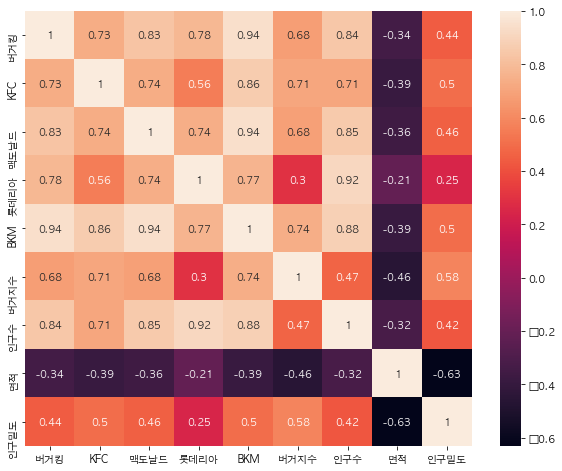

In [272]:
import seaborn as sns
from matplotlib import rc
import warnings
warnings.filterwarnings(action='ignore')
rc('font', family='AppleGothic')

plt.figure(figsize=(10,8))
sns.heatmap(final_df.corr(), annot=True)
plt.show()

False
0.2217569006277145
0.22175690062771544
False
0.33956672662286586
0.3395667266228674


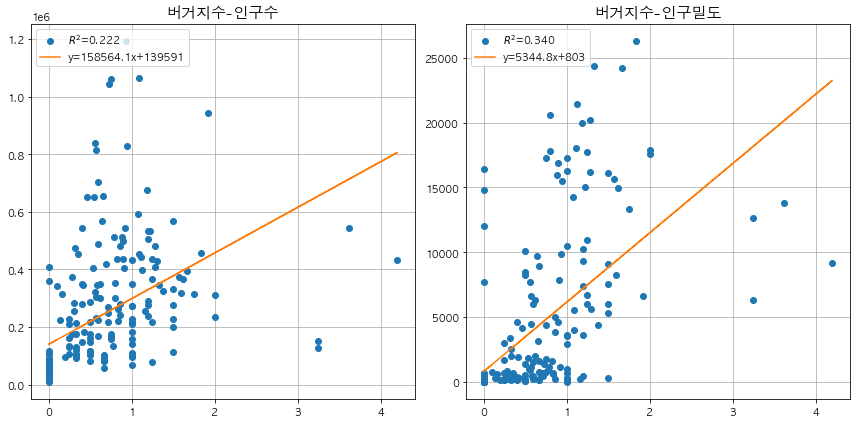

In [281]:
import scipy.stats
x = final_df["버거지수"]
col_label = ["인구수", "인구밀도"]

fig, axes = plt.subplots(1,2, figsize=(12,6))

for i in range(2):
    ax = axes[i]
    y_label = col_label[i]
    y = final_df[y_label]
    
    z = np.polyfit(x,y,1)
    f = np.poly1d(z)
    
    R = np.corrcoef(x,y)[0,1]
    r = scipy.stats.pearsonr(x,y)[0]
    print(R==r)
    print(R**2)
    print(r**2) # 비슷함!
    
    ax.plot(x, y,'o', label=r'$R^{2}$'+'={:.3f}'.format(R**2))
    ax.plot(x, f(x), label='y={:.1f}x+{:.0f}'.format(z[0],z[1]))
    ax.set_title("버거지수-"+y_label, fontsize=15)
    ax.grid(True)
    ax.legend(loc=2)
    
plt.tight_layout()

In [280]:
import plotly
import cufflinks as cf
import plotly.express as px

# 오프라인 모드에서도 인터렉티브한 그래픽을 가능하도록 함
from plotly.offline import download_plotlyjs,init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()


# px.scatter(nstore_stat_df, x='버거지수', y='인구', trendline='ols', hover_name='시도별')
px.scatter(final_df, x="버거지수",y="인구수", hover_name='주소', trendline='ols')

In [251]:
final_df[final_df["버거지수"] == 1]

,버거킹,KFC,맥도날드,롯데리아,BKM,버거지수,주소,주소1,주소2,광역시도,시군구,인구수,면적,인구밀도
4,2.0,0.0,0.0,2.0,2.0,1.0,강원도 홍천군,강원도,홍천군,강원도,홍천군,69150,1820.310462,37.988025
13,1.0,0.0,1.0,2.0,2.0,1.0,경기도 동두천시,경기도,동두천시,경기도,동두천시,94768,95.664308,990.630696
30,2.0,2.0,1.0,5.0,5.0,1.0,경기도 하남시,경기도,하남시,경기도,하남시,272455,92.991186,2929.901335
35,3.0,1.0,4.0,8.0,8.0,1.0,경상남도 양산시,경상남도,양산시,경상남도,양산시,350759,485.604354,722.314364
41,2.0,0.0,1.0,3.0,3.0,1.0,경상북도 김천시,경상북도,김천시,경상북도,김천시,141229,1009.801474,139.858184
42,1.0,0.0,0.0,1.0,1.0,1.0,경상북도 상주시,경상북도,상주시,경상북도,상주시,100688,1254.640829,80.252450
47,3.0,0.0,2.0,5.0,5.0,1.0,광주광역시 남구,광주광역시,남구,광주광역시,남구,218060,61.018238,3573.685625
49,4.0,1.0,5.0,10.0,10.0,1.0,광주광역시 북구,광주광역시,북구,광주광역시,북구,433533,120.280473,3604.350641
66,1.0,0.0,4.0,5.0,5.0,1.0,부산광역시 동래구,부산광역시,동래구,부산광역시,동래구,271247,16.631774,16308.963794
70,2.0,1.0,3.0,6.0,6.0,1.0,부산광역시 연제구,부산광역시,연제구,부산광역시,연제구,209395,12.098903,17306.940968


In [252]:
px.scatter(final_df, x="버거지수",y="인구밀도", hover_name='주소', trendline='ols')

,광역시도,시군구,인구수,주소,면적,인구밀도
100,경기도,여주시,111083,경기도 여주시,608.298372,182.612687
